- Graphs are a more general structure than trees we can think of a tree as a special kind of graph.
- Graphs can be used to represent many real-world things such as systems of roads, airline flights from city to city, how the Internet is connected, etc.
- Once we have a good representation for a problem, we can use some standard graph algorithms to solve what otherwise might seem to be a very difficult problem.

### Vocabulary and Definitions

- A **vertex** (also called a "**node**") is a fundatmental part of a graph.
- It can have a name, which we will call the "key".
- A vertex may also have additional information.
- We will call this additional informaiton the "payload".

- An **edge** connects two vertices to show that there is a relationship between them.
- Edges may be one-way or two-way.
- If the edges in a graph are all one-way, we say that the graph is a **direct graph**, or a **graph**.

- A graph can be represented by **G** where **G=(V,E)**.
- For the graph **G**, **V** is a set of vertices and **E** is a set of edges.
- Each edge is a tuple **(v,w)** where **w,v${\in}$V**.
- We can add a third component to the edge tuple to represent a weight.
- A subgraph **s** is a set of edges **e** and vertices **v** such that **e${\subset}$E** and **v${\subset}$V**.
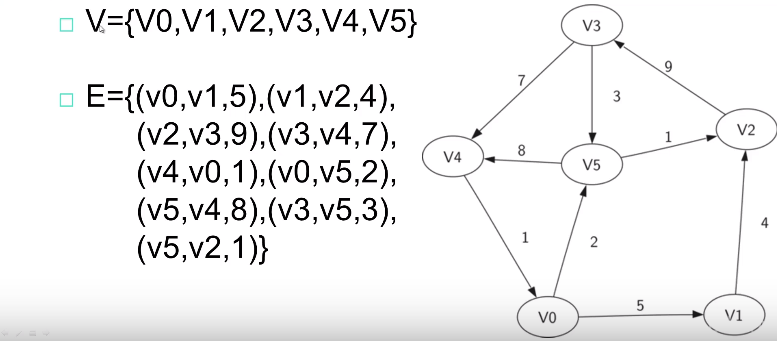

- A **path** in a graph is a sequence of vertices that are connected by edges.
- Formally we would define a path as **w$_1$,w$_2$,...,w$_n$** such that **(w$_i$,w$_{i+1}$)${\in}$E** for all **1${\leq}$i${\leq}$n-1**.
- The unweighted path length is the number of edges in the path, specifically **n-1**.
- The weighted path length is the sum of the weights of all the edges in the path.

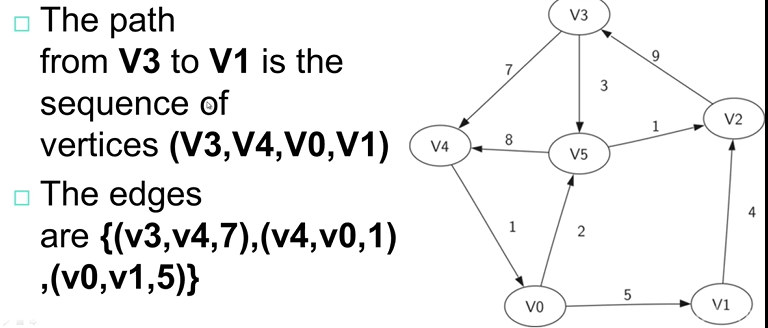

- A **cycle** in a directed graph is a path that starts and ends at the same vertex.
- A graph with no cycles is called a **acyclic graph**.
- A directed graph with no cycles is called a **direct acyclic graph** or **DAG**.

### Adjacency Matrix and List
#### ----How to represent graphs

#### Adjacency Matrix
- One of the easiest ways to represent a graph is to use a two-dimensional matrix.
- In this matrix implementation, each of the rows and columns represent a vertex in the graph.
- The value that is stored in the cell at the intersection of row **v** and column **w** indicates if there is an edge from vertex **v** to vertex **w**.
- When two vertices are connected by an edge, we say that they are **adjacent**.

- The advantage of the adjacency matrix is that it is simple, and for small graphs it is easy to see which nodes are connected to others node.
- However, notice that most of the cells in the matrix are empty.
- Because most of the cells are empty we say that this matrix is "sparse".
- A matrix is not a very efficient way to store sparse data.

- The adjacency matrix is a good implementation for a graph when the number of edges is large.
- Since there is one row and one colunm for every vertex in the graph, the number of edges required to fill the matrix is **|V|$^2$**.
- A matrix is full when every vertex is connected to every other vertex.

#### Adjacency List
- A more space-efficient way to implement a sparsely connected graph is to use an adjacency list.
- In an adjacency list implementation we keep a master list of all the vertices in the Graph object and then each vertex object in the graph maintains a list of the other vertices that it is connected to.
- In our implementation of the Vertex class we will use a dictionary rather than a list where the dictionary keys are the vertices, and the values are the weights.

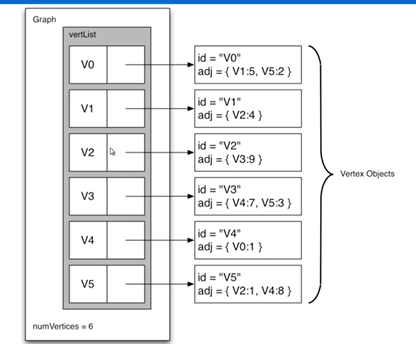

- The advantage of the adjacency list implementation is that is allows us to compactly represent a sparse graph.
- The adjacency list also allows us to easily find all the links that are directly connected to a particular vertex.

In [17]:
class Vertex:
    
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}
        
    def addNeighbor(self, nbr, weight):
        self.connectedTo[nbr] = weight
        
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self, nbr):
        return self.connectedTo[nbr]
    
    def __str__(self):
        return str(self.id) + " connected to: " + str([x.id for x in self.connectedTo])

In [18]:
class Graph:
    
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0
        
    def addVertex(self, key):
        self.numVertices += 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex
    
    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
        
    def addEdge(self, f, t, cost = 0):
        # from, to, weight
        
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
            
        self.vertList[f].addNeighbor(self.vertList[t], cost)
        
    def getVertices(self):
        return self.vertList.keys()
    
    def __iter__(self):
        return iter(self.vertList.values())
    
    def __contains__(self, n):
        return n in self.vertList

In [19]:
g = Graph()
for i in range(6):
    g.addVertex(i)

In [20]:
g.vertList

{0: <__main__.Vertex at 0x195ecb0b550>,
 1: <__main__.Vertex at 0x195ecb0bac8>,
 2: <__main__.Vertex at 0x195ecb0b940>,
 3: <__main__.Vertex at 0x195ecb0ba58>,
 4: <__main__.Vertex at 0x195ecb0b588>,
 5: <__main__.Vertex at 0x195ecb0b710>}

In [21]:
g.addEdge(0,1,2)

In [22]:
for vertex in g:
    print(vertex)
    print(vertex.getConnections)

0 connected to: [1]
<bound method Vertex.getConnections of <__main__.Vertex object at 0x00000195ECB0B550>>
1 connected to: []
<bound method Vertex.getConnections of <__main__.Vertex object at 0x00000195ECB0BAC8>>
2 connected to: []
<bound method Vertex.getConnections of <__main__.Vertex object at 0x00000195ECB0B940>>
3 connected to: []
<bound method Vertex.getConnections of <__main__.Vertex object at 0x00000195ECB0BA58>>
4 connected to: []
<bound method Vertex.getConnections of <__main__.Vertex object at 0x00000195ECB0B588>>
5 connected to: []
<bound method Vertex.getConnections of <__main__.Vertex object at 0x00000195ECB0B710>>
